# Understanding stabilizer

# Class of quantum state

In [2]:
from gates import *

In [5]:

class QuantumState:

    def __init__(self, state_vector: np.ndarray[qtype] = None, qubit_number: int = 1) -> None:
        '''
        If the user doesn't specify the state vecter, we will create a default state
        |000...000> for him.
        '''
        if state_vector is None:
            state_vector = np.array([0] * (2 ** qubit_number), dtype=qtype)
            state_vector[0] = 1
        # The input dimension of state vector must be (n,)
        elif len(list(state_vector.shape)) > 1:
            raise ValueError(f"Invalid dimension: {state_vector} is not a vector.")
        self.qubit_number = qubit_number
        if 2 ** qubit_number != state_vector.shape[0]:
            raise ValueError("Qubit number doesn't match the shape of the state vector")
        self.state_vector = state_vector
        self.normalize()

    '''
    Reset the state.
    '''

    def reset_state(self, state_vector: np.ndarray[qtype] = None) -> None:
        # The input dimension of state vector must be (n,)
        if len(list(state_vector.shape)) > 1:
            raise ValueError(f"Invalid dimension: {state_vector} is not a vector.")
        self.qubit_number = self.qubit_number
        '''
        If the user doesn't specify the state vecter, we will create a default state
        |000...000> for him.
        '''
        if state_vector is None:
            state_vector = np.array([0] * (2 ** self.qubit_number), dtype=qtype)
            state_vector[0] = 1
        if 2 ** self.qubit_number != state_vector.shape[0]:
            raise ValueError("Qubit number doesn't match the shape of the state vector")
        self.state_vector = state_vector
        # self.normalize()

    def normalize(self) -> None:
        norm = np.sqrt(sum([abs(x) ** 2 for x in self.state_vector]))
        if norm == 0:
            raise ValueError(f"Invalid state vector: {self.state_vector} has norm 0")
        self.state_vector = np.array([x / norm for x in self.state_vector], qtype)

    def inner_product(self, other_state: "QuantumState") -> np.ndarray:
        if self.state_vector.shape != other_state.state_vector.shape:
            raise ValueError("States must have the same dimension")
        return np.inner(self.state_vector, other_state.state_vector)

    def tensor_product(self, other_state: "QuantumState") -> "QuantumState":
        tensor_product_vector = np.kron(self.state_vector, other_state.state_vector)
        return QuantumState(np.array(tensor_product_vector, dtype=qtype),
                            qubit_number=self.qubit_number + other_state.qubit_number)

    '''
    Print the dirac notation of the state
    '''

    def show_state_dirac(self) -> None:
        Dirac_string = ""
        for i in range(1 << self.qubit_number):
            if self.state_vector[i] != 0:
                '''
                If the length of Dirac_string is not 0, Should also add a plus sign
                '''
                if len(Dirac_string) > 0:
                    Dirac_string += "+"
                bitstring = bin(i)[2:].zfill(self.qubit_number)
                Dirac_string += f"{self.state_vector[i]}|{bitstring}>"
        print(Dirac_string)

    def show_state(self) -> None:
        print(self.state_vector)

In [6]:
state=QuantumState(qubit_number=1)

In [7]:
state.show_state_dirac()

(1+0j)|0>


In [8]:
state=QuantumState(qubit_number=2)

In [9]:
state.show_state_dirac()

(1+0j)|00>


# Evolve quantum state by adding quantum gates

In [10]:
state=QuantumState(qubit_number=1)
print()
H=Hadamard()
print(H.matrix())


[[ 0.70710677+0.j  0.70710677+0.j]
 [ 0.70710677+0.j -0.70710677+0.j]]


This is an example of generate a |+> state by H|0>

In [12]:
state.reset_state(np.matmul(H.matrix(),state.state_vector))
state.show_state_dirac()

(0.7071067690849304+0j)|0>+(0.7071067690849304+0j)|1>


This is an example of generate a |-> state by HX|0>

In [13]:
state=QuantumState(qubit_number=1)
H=Hadamard()
X=PauliX()
state.reset_state(np.matmul(X.matrix(),state.state_vector))
state.reset_state(np.matmul(H.matrix(),state.state_vector))
state.show_state_dirac()

(0.7071067690849304+0j)|0>+(-0.7071067690849304+0j)|1>


# Decomposing arbitrary two qubit gates to Clifford

In [1]:
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator


# Create a circuit with a register of three qubits
circ = QuantumCircuit(2)

gate = Operator([
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 0]
])

circ.unitary(gate, [0, 1], label='myfate')


target_basis = ['rz', 'h', 'cx']
decomposed = transpile(circ,
                       basis_gates=target_basis, 
                       optimization_level=0)  # 0 for no optimization, 3 is max

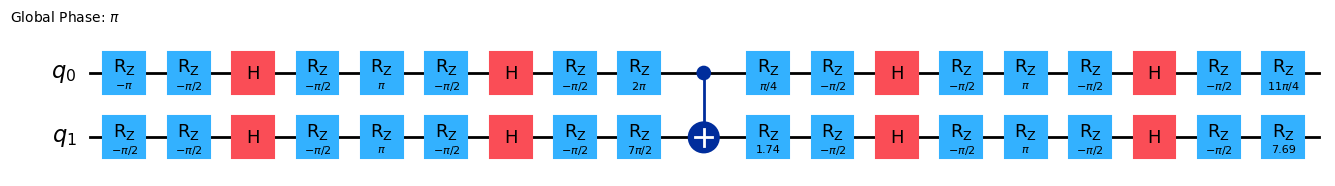

In [2]:
# Draw the circuit
decomposed.draw('mpl')

In [29]:
from qiskit.synthesis import SolovayKitaevDecomposition
import numpy as np

In [31]:
SVdecomposer=SolovayKitaevDecomposition()

gatematrix = np.array([[1, 0],[0, np.exp(1j*np.pi/4)]])

circuit=SVdecomposer.run(gatematrix,recursion_degree=2)

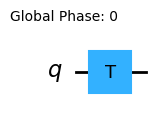

In [33]:
circuit.draw('mpl')

In [14]:
list(circuit)

[CircuitInstruction(operation=Instruction(name='t', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='t', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='t', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='t', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='t', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=()),
 CircuitInstruction(operation=Instruction(name='t', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(